<a href="https://colab.research.google.com/github/rahuler13020567-debug/Project-3/blob/main/EDA_for_Real_Estate_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing_data.csv")

In [ ]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [ ]:
df.tail()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,1459,SC20,RL,75,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [ ]:
df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
(df['Alley'].isnull().sum()/len(df))*100


np.float64(93.76712328767123)

In [ ]:
(df['MasVnrType'].isnull().sum()/len(df))*100

np.float64(59.726027397260275)

In [ ]:
df['Alley'] = df['Alley'].fillna('No Alley Access')
df['Alley'] = df['Alley'].replace('None', 'No Alley Access')

In [ ]:
df['Alley'].value_counts()

,count
Alley,
No Alley Access,1369
Grvl,50
Pave,41


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
   df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
for col in num_cols:
    df = df[df[col] >= 0]

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [ ]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


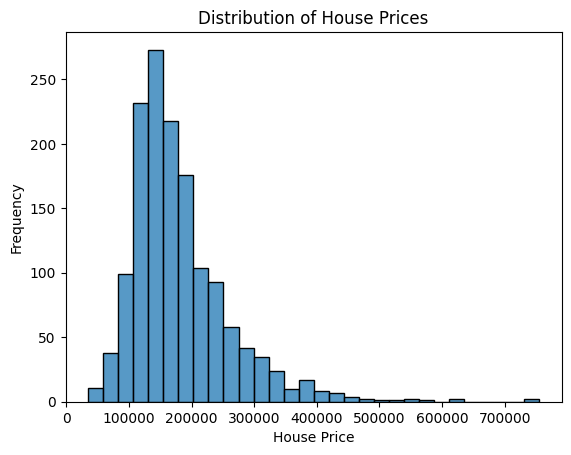

In [ ]:
plt.figure()
sns.histplot(df['SalePrice'], bins=30, kde=False)
plt.title("Distribution of House Prices")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()

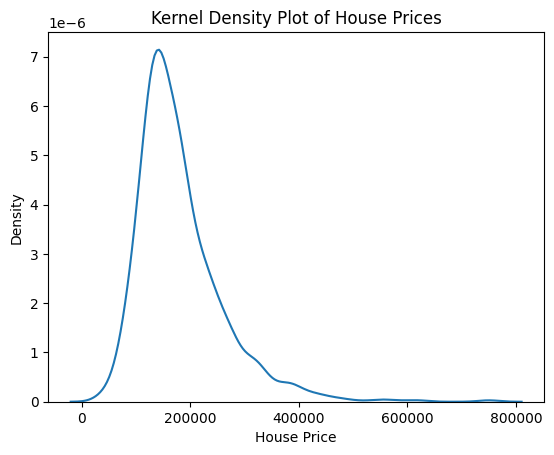

In [ ]:
plt.figure()
sns.kdeplot(df['SalePrice'])
plt.title("Kernel Density Plot of House Prices")
plt.xlabel("House Price")
plt.show()

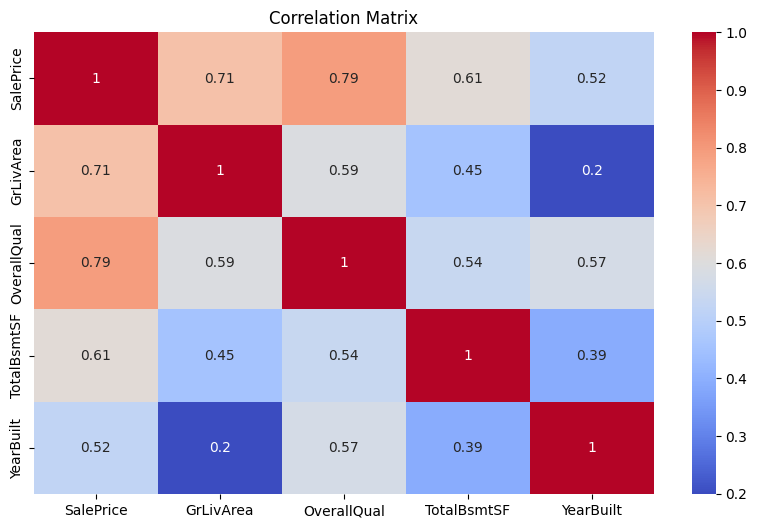

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['SalePrice', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

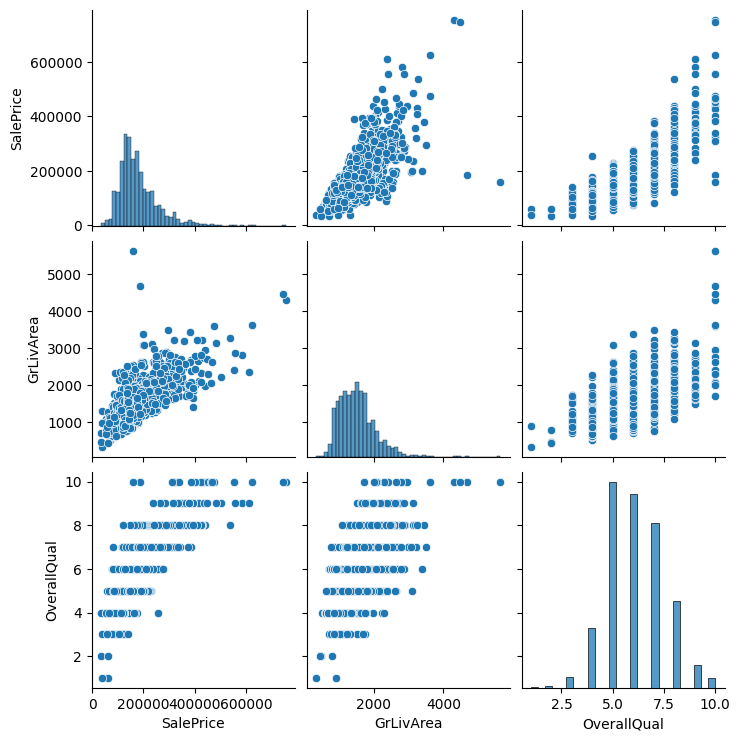

In [ ]:
sns.pairplot(df[['SalePrice', 'GrLivArea', 'OverallQual']])
plt.show()

In [ ]:
df['PricePerSqFt'] = df['SalePrice'] / df['GrLivArea']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

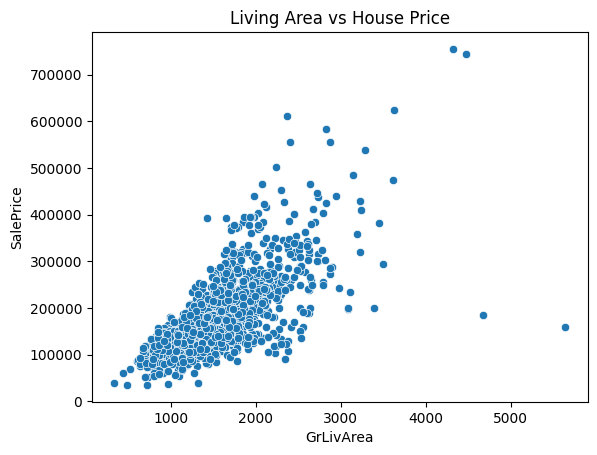

In [ ]:
plt.figure()
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Living Area vs House Price")
plt.show()

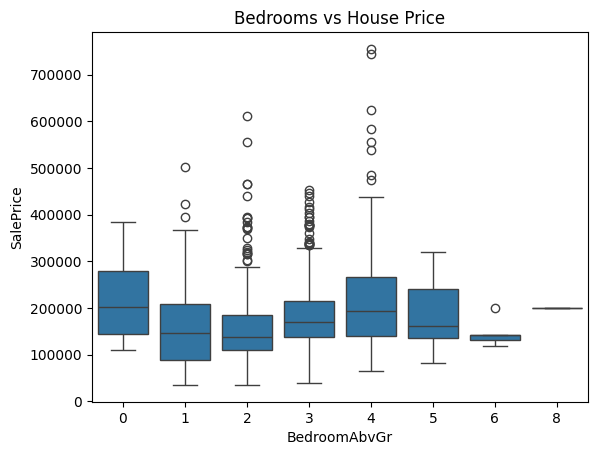

In [ ]:
plt.figure()
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title("Bedrooms vs House Price")
plt.show()

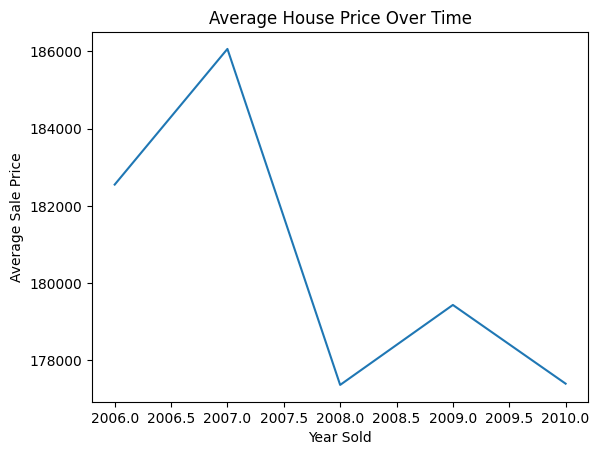

In [ ]:
price_trend = df.groupby('YrSold')['SalePrice'].mean()
plt.figure()
price_trend.plot()
plt.title("Average House Price Over Time")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price")
plt.show()

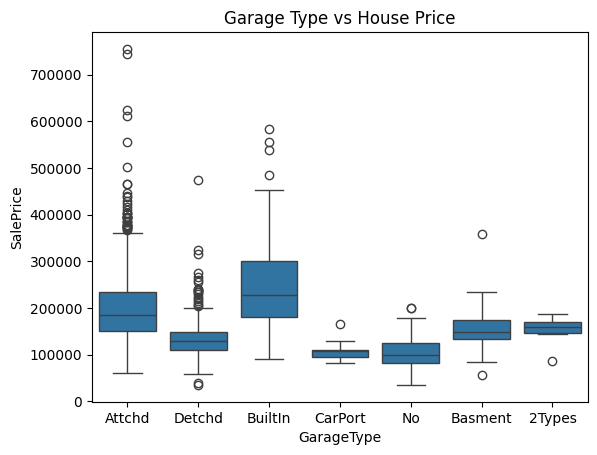

In [ ]:
plt.figure()
sns.boxplot(x='GarageType', y='SalePrice', data=df)
plt.title("Garage Type vs House Price")
plt.show()


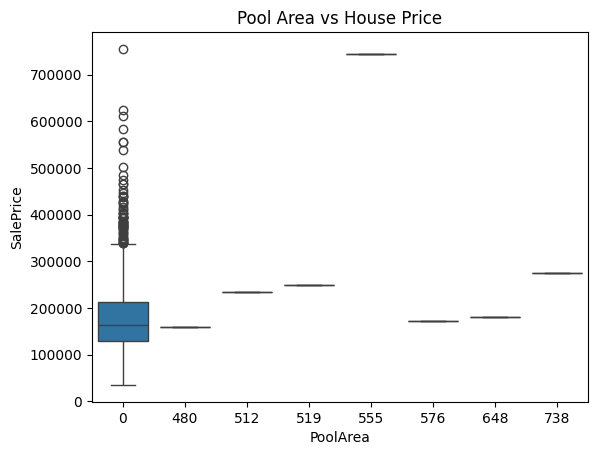

In [ ]:
plt.figure()
sns.boxplot(x='PoolArea', y='SalePrice', data=df)
plt.title("Pool Area vs House Price")
plt.show()